<a href="https://colab.research.google.com/github/DrakeCS167Spring22/cs167project1-tjmorrisondrakeedu/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Tj Morrison

# Project \#1 Starter Code: 
Your first step is to decide which dataset you would like to work with for this project. You can find the data on Blackboard. 

The options include: 
- [Ramen Ratings](https://www.kaggle.com/residentmario/ramen-ratings)
- [Chocolate Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings)
- [World Happiness Data](https://www.kaggle.com/unsdsn/world-happiness)
- [Heart Failure Prediction](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Let's start by taking a look at these different datasets. (you can get rid of this once you decide which one you want to use). 

In [1]:
from google.colab import drive
import pandas
drive.mount('/content/drive')
heart = pandas.read_csv('/content/drive/MyDrive/CS167Datasets/heart.csv')
heart

Mounted at /content/drive


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Problem: 
**Which dataset are you going to use? What questions are you going to ask about this dataset? Make sure that you can answer the question using ML models. What are your predictor variables and target variable?**

Using the Heart Failure Prediction dataset, I want to see if it is possible to predict if new patients with certain classifications and health conditions can be accurately predicted to have Heart Disease. I also want to look at which variables can be most helpful in our prediction. To do this I will be using many different machine learning algorithms and comparing them to find out which model will predict Heart Failure most accurately.

Our target variable will be "HeartDisease" because it is the classification we are trying to predict.
Our predictor variables will be "RestingBP", "Cholesterol", "MaxHR", "Sex", and "Age", because I feel that these variables are logically going to be most significant and unbias in determining our target variable.

# Data Preparation
**Explain your data prep. What did you do to get your data in the shape for your experiments? (e.g. creation of dummy variables, filling in missing values, etc).**

In the data prep process:
1. I first wanted to exclude variables that were left in from the original dataset that I wasn't planning on using in my predictive models.
2. I wanted to check to make there there were no missing variables in my dataset, else fill them in with the mean. (And checking "Sex" with unique to varify that the original dataset didn't contain a filler variable like "unknown") Thankfully though, none of our data was missing.
3. In order to get scikit learn to take "Sex" we will convert "M" => 1 and "F" => 0.

Looking at the dataset, it otherwise seems clean and well-organized. Perfectly suited for how we plan on using it with not much more data prep nesseccary.

In [2]:
# data prep code
clean_heart = heart[["HeartDisease", "Sex", "RestingBP", "Cholesterol", "MaxHR", "Age"]]
clean_heart.isna().any()
clean_heart["Sex"].unique()
clean_heart.loc[clean_heart["Sex"] == "M" , "Sex"] = 1
clean_heart.loc[clean_heart["Sex"] == "F" , "Sex"] = 0





/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Metrics
**Identify which metrics you will be using to test your model and say why they are appropriate.**

The metrics used for this project are going to be classification as the answer is a binary "Yes" this person has heart disease or "No" this person does not have heart disease. There is no inbetween or scaling required on the target vairables in this problem.

# Baseline Performance
**Identify a baseline for your metrics - what would you expect to happen with this particular data if you always guessed the average or if you guessed randomly? What did some of the unsuccessful machine learning algorithms yield?**

The baseline for our metrics will be accuracy as it will help us to determine whether or not our algorithm is correctly determining classifying our target variable.

Guessing randomly or guessing the "Average" would always lead us to guess 100% yes or no one way or the other. Which isn't very helpful as it means that you're only going to be accounting for the accuracy of true positives while setting the others as false positive or vice versa. If you had a large skew where it was 90% likely that a person DID have heart disease in this dataset, the algorithm guessing the average would always pick yes, which is as useful as not having the algorithm at all.

In this instance the split in the dataset seems to be about a 40/50 split on whether or not someone has heart disease. And if we use our algorithm to and degree of utility, we should see a large difference in accuracy between guessing the average (50/90, or 55% accuracy) and actually predicting heart disease.

In [ ]:
# build and test a baseline model here

# Model planning and Execution
Identify which learning algorithms you have tried and which important parameters you’ve tuned for each one.


In [ ]:
# Execute your plan here (build and test your models to answer your question)

In [5]:
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

target= 'HeartDisease'
predictors = clean_heart.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=41)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


# KNN
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier()
neigh.fit(train_data, train_sln)
heart_predictions = neigh.predict(test_data)

print("\nKNN")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))


KNN
Accuracy: 0.7010869565217391
-----------
    0   1
0  55  30
1  25  74


In [3]:
import sklearn
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors

target= 'HeartDisease'
predictors = clean_heart.columns.drop(target)
train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=41)

# NORMALIZATION

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


# KNN
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier()
neigh.fit(train_data, train_sln)
heart_predictions = neigh.predict(test_data)

print("\nKNN")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# KNN NORMALIZED
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier()
neigh.fit(train_data_normalized, train_sln)
heart_predictions = neigh.predict(test_data_normalized)

print("\nKNN Normalized")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# KNN WEIGHTED
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier(weights="distance")
neigh.fit(train_data, train_sln)
heart_predictions = neigh.predict(test_data)

print("\nKNN Weighted")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# KNN WEIGHTED NORMALIZED
from sklearn import neighbors

neigh = neighbors.KNeighborsClassifier(weights="distance")
neigh.fit(train_data_normalized, train_sln)
heart_predictions = neigh.predict(test_data_normalized)

print("\nKNN Weighted Normalized")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# DECISION TREE
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(train_data, train_sln)
heart_predictions = dt.predict(test_data)

print("\nDecision Tree")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# DECISION TREE NORMALIZED
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(train_data_normalized, train_sln)
heart_predictions = dt.predict(test_data_normalized)

print("\nDecision Tree Normalized")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat,index = heart_labels, columns = heart_labels))

# RANDOM FOREST
forest = RandomForestClassifier(random_state = 0, n_estimators=100)
forest.fit(train_data,train_sln)
heart_predictions = forest.predict(test_data)

print("\nRandom Forest")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat, index = heart_labels, columns = heart_labels))

# RANDOM FOREST NORMALIZED
forest = RandomForestClassifier(random_state = 0, n_estimators=100)
forest.fit(train_data_normalized,train_sln)
heart_predictions = forest.predict(test_data_normalized)

print("\nRandom Forest Normalized")
print("Accuracy:", metrics.accuracy_score(test_sln, heart_predictions))
print("-----------")
# Confusion matrix
heart_labels= [0, 1]
conf_mat = metrics.confusion_matrix(test_sln, heart_predictions, labels=heart_labels)
print(pandas.DataFrame(conf_mat, index = heart_labels, columns = heart_labels))


# Feature Importances Chart
print("\nFeature Importances Chart")
index = range(len(predictors))
plt.figure(figsize=(8,8)) # making the table bigger
plt.barh(index,forest.feature_importances_,height=0.8) # horizontal bar
plt.ylabel('Features')
plt.yticks(index,predictors) # putting the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()



KNN
Accuracy: 0.7010869565217391
-----------
    0   1
0  55  30
1  25  74

KNN Normalized
Accuracy: 0.717391304347826
-----------
    0   1
0  59  26
1  26  73

KNN Weighted
Accuracy: 0.6956521739130435
-----------
    0   1
0  55  30
1  26  73

KNN Weighted Normalized
Accuracy: 0.7228260869565217
-----------
    0   1
0  59  26
1  25  74

Decision Tree
Accuracy: 0.6630434782608695
-----------
    0   1
0  59  26
1  36  63

Decision Tree Normalized
Accuracy: 0.6630434782608695
-----------
    0   1
0  60  25
1  37  62

Random Forest
Accuracy: 0.782608695652174
-----------
    0   1
0  60  25
1  15  84

Random Forest Normalized
Accuracy: 0.7717391304347826
-----------
    0   1
0  59  26
1  16  83

Feature Importances Chart


NameError: ignored

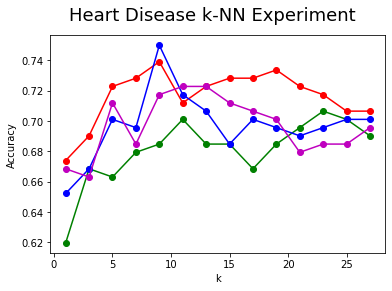

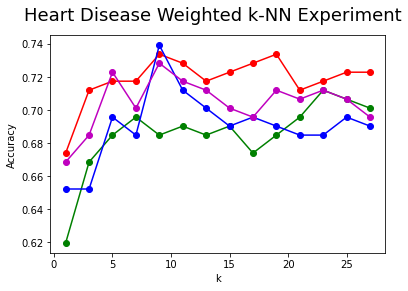

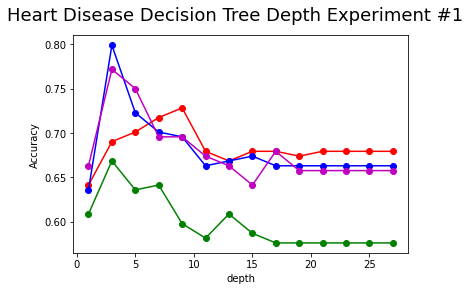

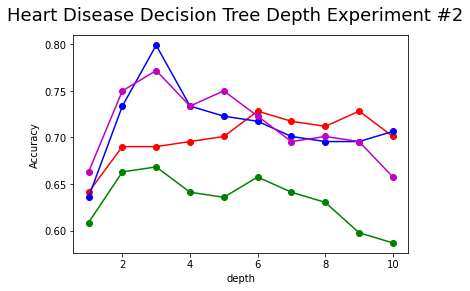

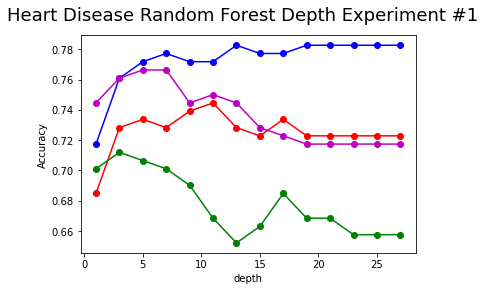

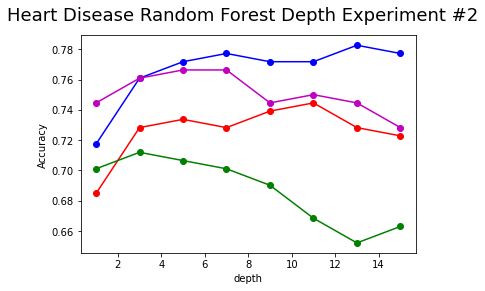

In [4]:
# GRAPH PARAMETER CODE FROM NB 3
import matplotlib.pyplot as plt
%matplotlib inline

k_vals = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
random_state_list = [10, 33, 41, 82]
line_types = ['ro-', 'go-', 'bo-', 'mo-']

# KNN Graphed Ks
plt.suptitle('Heart Disease k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
# Random State = [10, 33, 41, 82], k_vals = [1,3,5,7,9,11,13,15,17,19,21,23,25,27], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  kNN_accuracies = []
  for k in k_vals:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_data, train_sln)
    heart_predictions = neigh.predict(test_data)
    kNN_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(k_vals,kNN_accuracies,line_types[index],label='k-NN')
plt.show()

# KNN WEIGHTED Graphed Ks
plt.suptitle('Heart Disease Weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
# Random State = [10, 33, 41, 82], k_vals = [1,3,5,7,9,11,13,15,17,19,21,23,25,27], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  kNN_accuracies = []
  for k in k_vals:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance")
    neigh.fit(train_data, train_sln)
    heart_predictions = neigh.predict(test_data)
    kNN_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(k_vals,kNN_accuracies,line_types[index],label='k-NN')
plt.show()

max_depth_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
random_state_list = [10, 33, 41, 82]
dt = tree.DecisionTreeClassifier(random_state = 0)
dt.fit(train_data, train_sln)
heart_predictions = dt.predict(test_data)

# DECISION TREE Graphed Depths #1
plt.suptitle('Heart Disease Decision Tree Depth Experiment #1',fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')
# Random State = [10, 33, 41, 82], max_depth_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  DecisionTree_accuracies = []
  for depth in max_depth_list:
    dt = tree.DecisionTreeClassifier(random_state = 0, max_depth = depth)
    dt.fit(train_data, train_sln)
    heart_predictions = dt.predict(test_data)
    DecisionTree_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(max_depth_list,DecisionTree_accuracies,line_types[index],label='k-NN')
plt.show()

# DECISION TREE Graphed Depths #2
plt.suptitle('Heart Disease Decision Tree Depth Experiment #2',fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')

max_depth_list = [1,2,3,4,5,6,7,8,9,10]
# Random State = [10, 33, 41, 82], max_depth_list = [1,2,3,4,5,6,7,8,9,10], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  DecisionTree_accuracies = []
  for depth in max_depth_list:
    dt = tree.DecisionTreeClassifier(random_state = 0, max_depth = depth)
    dt.fit(train_data, train_sln)
    heart_predictions = dt.predict(test_data)
    DecisionTree_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(max_depth_list,DecisionTree_accuracies,line_types[index],label='k-NN')
plt.show()

# RANDOM FOREST Graphed Depths
plt.suptitle('Heart Disease Random Forest Depth Experiment #1',fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')

max_depth_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
# Random State = [10, 33, 41, 82], max_depth_list = [1,3,5,7,9,11,13,15,17,19,21,23,25,27], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  RandomForest_accuracies = []
  for depth in max_depth_list:
    forest = RandomForestClassifier(random_state = 0, n_estimators=100, max_depth = depth)
    forest.fit(train_data,train_sln)
    heart_predictions = forest.predict(test_data)
    RandomForest_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(max_depth_list,RandomForest_accuracies,line_types[index],label='k-NN')
plt.show()

# RANDOM FOREST Graphed Depths #2
plt.suptitle('Heart Disease Random Forest Depth Experiment #2',fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')

max_depth_list = [1,3,5,7,9,11,13,15]
# Random State = [10, 33, 41, 82], max_depth_list = [1,3,5,7,9,11,13,15], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  RandomForest_accuracies = []
  for depth in max_depth_list:
    forest = RandomForestClassifier(random_state = 0, n_estimators=100, max_depth = depth)
    forest.fit(train_data,train_sln)
    heart_predictions = forest.predict(test_data)
    RandomForest_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(max_depth_list,RandomForest_accuracies,line_types[index],label='k-NN')
plt.show()




# Results
**After you conduct your learning experiment, summarize the results you got. Include visualizations (i.e. graphs) where appropriate.  How did you find the best k, n, m or other variables that you needed to tune.**

After Looking at the different model accuracies and tuning some of their parameters, I conclude that the Random Forest would be the best choice for this model. The accuracy for this model upon the first test was the highest, which was a good indication for the results of the graphs. The different colored graphs above showcase different random states for the data. From this we can test how the model will run with many different random inputs of data (AKA test the accuracy in a artificial environment which would act like a logical extention of a real environment). The best and worst case of the Random Forest in these artifical environments under the right parameters (a small max_depth) did better than any of the other models.

The only other model that would compare in terms of predictive accuracy would be weighted KNN, which had a similar lower limit accuracy but the upper limit accuracy wasn't as high at any point in the graph.

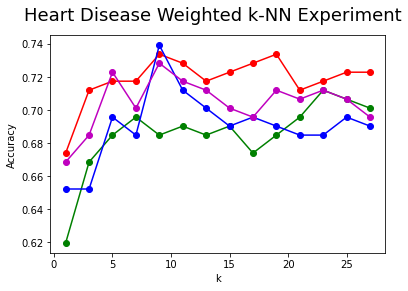

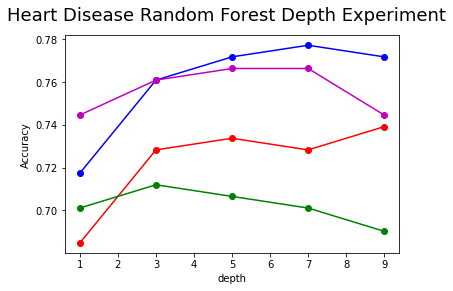

In [ ]:
# Include code to show your results (graphs, etc)

k_vals = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
random_state_list = [10, 33, 41, 82]
line_types = ['ro-', 'go-', 'bo-', 'mo-']

# KNN WEIGHTED Graphed Ks
plt.suptitle('Heart Disease Weighted k-NN Experiment',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
# Random State = [10, 33, 41, 82], k_vals = [1,3,5,7,9,11,13,15,17,19,21,23,25,27], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  kNN_accuracies = []
  for k in k_vals:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights="distance")
    neigh.fit(train_data, train_sln)
    heart_predictions = neigh.predict(test_data)
    kNN_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(k_vals,kNN_accuracies,line_types[index],label='k-NN')
plt.show()

# RANDOM FOREST Graphed Depths
plt.suptitle('Heart Disease Random Forest Depth Experiment',fontsize=18)
plt.xlabel('depth')
plt.ylabel('Accuracy')

max_depth_list = [1,3,5,7,9]
# Random State = [10, 33, 41, 82], max_depth_list = [1,3,5,7,9], test_size = 0.2

for index in range(len(random_state_list)):
  train_data, test_data, train_sln, test_sln = train_test_split(clean_heart[predictors], clean_heart[target], test_size = 0.2, random_state=random_state_list[index])
  RandomForest_accuracies = []
  for depth in max_depth_list:
    forest = RandomForestClassifier(random_state = 0, n_estimators=100, max_depth = depth)
    forest.fit(train_data,train_sln)
    heart_predictions = forest.predict(test_data)
    RandomForest_accuracies.append(metrics.accuracy_score(test_sln, heart_predictions))
  plt.plot(max_depth_list,RandomForest_accuracies,line_types[index],label='k-NN')
plt.show()

# Bumps in the Road:
**What challenges did you encounter? How did you overcome these challenges? Did you have to adapt your strategy to account for these challenges? Why or why not?**

Well, I originally had planned to include "Sex" and then ran into an error when using it with scikit-learn. Not wanting to get rid of the variable all together I decided to go back and see what I could do, and decided to turn "M", "F" into binary 1, 0 variables. This is especially significant for normalization as well, as now the sex variables could be ran through the function.

Apart from that there wasn't many other challenges. I believe this dataset really was well-built for machine learning as all the variables fit very nicely to the algorithms.

# Conclusions
What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

I would recommend using the Random Forest.

I am surprised though as when I first started this project I was much more confident in KNN being more useful here. Most of my variables were quanititive variables that I felt could be fixed with normalization. But even with normalization the accuracy didn't increase very significantly.

Though in reflection I can see that Decision Trees alone did not do well at choosing the data overall, which is what I expected from generalizing the numeric data. I didn't consider before this project the true power random forests have over decsion trees while generalizing quantitative variables. The ability to cross reference multiple trees makes the final decision a lot more accurate-even though before I didn't think this applied as significantly to non-categorical data.

Standard KNN and Weighted KNN did as I expected. Being rather standard options with both of them being rather close to each other. Though the power of both weighted and normalized KNN wasn't something I fully thought about I wasn't surprised with its outcome.

The Random Forest Normalization and Standard Random Forest thrown me a bit too as I figured that the categories wouldn't change (or would change to fit the scale) and the accuracy wouldn't change. But it seems as though the program made different post normalization that differed from the standard, which makes me curious into how it came to that conclusion.